<a href="https://colab.research.google.com/github/brayannmb/projeto_fraudes_cartao_credito/blob/main/Detec%C3%A7%C3%A3o_Fraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Portfólio - Detecção de Fraudes em Cartões de Crédito**

As fraudes em cartões de crédito tem sido um grande problema nos últimos anos, especialmente durante a pandemia. Neste período, onde as pessoas não podiam sair de suas casas, os criminosos enxergaram diversas oportunidades para atuar, uma delas foi as fraudes em cartões de crédito.


<center><img width="70%" src="https://github.com/brayannmb/projeto_fraudes_cartao_credito/blob/main/banner_cartao_credito.jpeg?raw=true"></center>

##**Introdução**

Segundo o site do [G1](https://g1.globo.com/economia/noticia/2021/06/24/cresce-no-de-consumidores-vitimas-de-fraudes-financeiras-no-brasil-veja-ranking-das-mais-recorrentes.ghtml), os prejuízos com fraudes financeiras chegam a 2.7 milhões de reais, onde foi analisado um período entre 2020 e 2021.

[*Phishing*](https://en.wikipedia.org/wiki/Phishing) uma das modalidades deste crime, foi um dos que esteve em ascenção neste período, este crime tem por função roubar as informações de usuários por meio ligações, emails e mensagens de texto. Os criminosos enviam mensagens se passando por instituições financeiras para convencer os usuários a passar os seus dados. 

Com base no que foi apresentando acima, para reduzir os impactos financeiros causados por este problema, as instituições financeiras utilizam modelos de aprendizado de máquina para detectar quando está ocorrendo uma fraude. Desta maneira, a instituição pode atuar antes que a transação seja finalizada.

## **Obtenção dos Dados**

Os dados que serão utilizados neste projeto foram extraidos do site do [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). Todos os dados foram anonimizados para manter a segurança e a privacidade de seus usuários, evitando qualquer tipo vazamento de dados.
Este conjunto de dados possui 284.807 entradas e 31 colunas referentes a dois dias, onde existem apenas três colunas que possuem nomes que podem ser identificados, pois, o restante também foram anonimizadas por questões de segurança. As variáveis que possuem nomes são: 

* Time: Tempo decorridos em segundos 
* Amount: Valor da transação
* Class: Variável target

O restante das 28 variáveis estão identificadas por da seguinte maneira V1, V2, V3 … V28.

Além deste dataset ter sido anonimizado, ele passou por um processo de redução de dimensionalidade chamado PCA (Principal Component Analysis). Este método estatistico tem por finalidade reduzir a dimensionalidade do conjunto de dados, resultando em componentes principais não correlacionadas que possuem uma maior variabilidade daquele conjunto de dados. Em outras palavras, este método reduz a quantidade variáveis e extrai as mais importantes, eliminando variáveis redundantes do conjunto de dados.


In [1]:
#bibliotecas utilizadas

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

#configurando estilo seaborn

sns.set_style('dark')

#obtenção dos dados

df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

##**Análise Exploratória de Dados**

A análise exploratória dos dados é uma das etapas mais importantes de um projeto de Ciência de Dados, onde buscamos ter uma melhor compreensão sobre os dados que estamos utilizando. 

Vou iniciar análise com uma boa prática de visualizar as primeiras e as últimas linhas do conjunto de dados.

In [2]:
# verificando as primeiras 5 linhas

df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# verificando as últimas 5 linhas

df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Em ambos os resultados não teve varlores ausentes, o que faz muito sentido, pois como sabemos que este conjunto de dados já sofreu algumas alterações, como o processo de PCA.

Embora, é meu dever como Cientista de Dados buscar por estes indesejados valores. Então, no próximo tópico irei verificar se existe valores ausentes no *dataset*.

### **Existem valores ausentes neste conjunto de dados?**


In [4]:
# realizando a verificação de valores ausentes e também quantidade de entradas, colunas e tipo de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Com base no resultado acima eu confirmo a minha hipótese de que não existem valores ausentes e também tenho como resultado outras informações, elas são:

* Todas as variáveis possuem tipo de dados float, exceto a variável *target* que tem seu tipo de dado int;
* Este conjunto de dados possui 284.807 entradas e 31 colunas.

### **Estatísticas Descritivas**

Seguindo adiante na análise, irei extrair algumas estatísticas descritivas de variáveis quantitativas do *dataset*.

In [5]:
# extraindo estatísticas descritivas de variáveis quantitativas
# método .T faz a transposição do resultado para uma melhor visualização

df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Pelo fato da grande maioria das variáveis terem passado por um processo de anonimazação, isso dificulta muito extrair informações relevantes. No entanto, algo que me chamou a atenção foi o valor mínimo da variável `Amount` ser 0. 

Em ambas as categorias de transações (fraudes e não fraudes), não faz sentido uma transação com este valor. 

Pensando nisso, irei seguir a análise buscando entender melhor essa variável.


### **Variável Amount**

Por ser uma das principais variáveis, irei despender um tempo maior buscando alguma informação relevante sobre esta variável.

O primeiro passo será verificar a quantidade de entradas que possui o valor da transação igual a zero, tanto para transações lícitas e fraudes.

In [6]:
# quantidade de transações lícitas que possuem valor igual à zero

df.loc[(df.Class == 0) & (df.Amount == 0)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,-0.059943,-0.508270,0.425506,0.414309,-0.698375,-1.465349,-0.119009,-0.144735,-1.332221,-1.547440,-0.133602,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,0.241979,0.144973,-0.583891,-1.595345,0.032613,0.752834,-0.094286,-0.163427,-1.111176,-1.124025,0.065979,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,0.511284,-0.178159,0.762909,1.700923,-0.133861,0.402418,0.684668,-0.609395,-0.704277,-0.720726,-0.006716,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,-0.371622,0.859741,0.372609,-1.240185,0.998391,-0.346387,-0.391679,0.348289,0.282125,1.165893,0.320450,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0
936,711.0,-0.431349,1.027694,2.670816,2.084787,-0.274567,0.286856,0.152110,0.200872,-0.596505,0.022224,-0.993674,0.244681,0.711846,-0.666973,-0.600267,0.480204,-0.438582,-0.119475,-0.681539,-0.057886,0.001241,0.154170,-0.141533,0.384610,-0.147132,-0.087100,0.101117,0.077944,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283719,171817.0,-0.750414,0.904175,0.996461,0.427284,1.720336,0.929256,0.794272,0.176719,-1.836261,0.233928,-0.569993,0.110682,0.784652,-0.261719,-2.370735,0.943657,-0.923311,-0.107890,0.044242,0.116340,0.050750,0.115532,-0.623995,-0.186896,0.733759,2.558151,-0.188835,0.001654,0.0,0
283782,171870.0,2.083677,-0.065811,-1.442870,0.135416,0.043035,-1.306975,0.335835,-0.371635,0.730560,-0.106473,-0.820816,0.268172,-0.431765,0.508677,0.186750,-0.518524,-0.147862,-0.728870,0.234239,-0.278137,-0.147536,-0.246599,0.194758,-0.082277,0.012887,-0.069278,-0.048995,-0.065482,0.0,0
283949,172027.0,2.132569,-0.057836,-1.724522,-0.030326,0.412146,-0.903088,0.345843,-0.348132,0.722638,-0.116179,-1.376166,0.234341,0.054018,0.394647,0.197209,-0.334269,-0.419726,-0.548358,0.492017,-0.232386,-0.188739,-0.343876,0.105024,-0.763831,0.117381,-0.027682,-0.047514,-0.071700,0.0,0
284085,172140.0,-2.210521,-1.039425,0.189704,-1.291932,3.742120,-1.665061,3.120388,-2.324089,0.364926,1.582486,1.099928,0.015128,0.071182,-1.056637,-1.611600,-0.609454,-1.876089,-0.411326,-0.556234,-0.818118,-0.286359,1.326003,-0.361764,-0.268117,1.051309,0.334629,-1.930149,-0.899888,0.0,0


O número surpreende, foram aproximadamente **1800 transações lícitas** com o valor de €0. 


In [7]:
# quantidade de fraudes que possuem valor igual à zero

df.loc[(df.Class == 1) & (df.Amount == 0)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
8842,12093.0,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,-4.594952,5.275506,-11.349029,0.374549,-8.138695,0.548571,-6.653594,-10.246755,-4.191066,0.991486,-0.158971,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.0,1
23308,32686.0,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,-2.734156,2.368434,-3.656803,-0.169535,-4.744413,0.765193,-2.479514,-4.931112,-2.547403,-0.902690,0.265250,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,0.0,1
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,-12.888158,6.854953,-13.211695,1.035612,-13.778956,1.040448,-11.290328,-20.578022,-7.547824,3.118480,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.0,1
69980,53658.0,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,-2.996669,0.747478,-4.596612,-1.927760,-4.757074,-1.247815,-2.535494,-5.356465,-1.974749,-0.603726,0.002749,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.0,1
93486,64443.0,1.079524,0.872988,-0.303850,2.755369,0.301688,-0.350284,-0.042848,0.246625,-0.779176,-0.157696,1.928568,-0.935863,-2.431446,-1.633472,0.534337,1.425606,1.593529,1.178468,-1.568698,-0.252115,-0.023255,-0.158601,-0.038806,-0.060327,0.358339,0.076984,0.018936,0.060574,0.0,1
93788,64585.0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,-0.194120,2.140057,-0.276309,-1.191306,-1.880275,0.398272,1.367433,1.522662,1.026317,-1.577070,-0.172659,-0.008996,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,0.0,1
141257,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,7.182967,-9.445943,-0.314620,-12.991466,-0.136359,-6.367524,-12.734394,-3.845130,1.007667,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.0,1
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,7.182967,-9.445943,-0.314620,-12.991466,-0.136359,-6.367524,-12.734394,-3.845130,1.007667,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.0,1
143333,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,-8.409665,6.309044,-8.576761,0.246747,-11.534046,-0.364265,-5.452495,-11.887570,-3.563585,0.876019,0.545698,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.0,1


As fraudes também possuem transações de €0, no total foram 27.

Um fato curioso, mas que infelizmente por falta de dados não pode ser compreendido.



Buscando extrair mais informações sobre essa variável, irei analisar o quanto foi transferido em euros neste dois e o quanto foi perdido em fraudes. 

In [8]:
# valor total de transações

total = df.Amount.sum()
print(f'Valor total de transações foi de: {(total):.0f}')

Valor total de transações foi de: 25162590


In [9]:
# valor total de fraudes

soma_fraudes = df.loc[(df.Class == 1)].Amount.sum()
print(f'Valor total das fraudes: {(soma_fraudes):.0f}')

Valor total das fraudes: 60128


In [10]:
# valor total de transações lícitas

soma_transacoes_licitas = df.loc[(df.Class == 0)].Amount.sum()
print(f'Valor total das transações lícitas: {(soma_transacoes_licitas):.0f}')

Valor total das transações lícitas: 25102462


In [11]:
#percentual de fraudes

percentual_fraudes = (soma_fraudes / total) * 100
print(f'Percentual de fraudes: {(percentual_fraudes):.2f}%')

Percentual de fraudes: 0.24%


De acordo com o analisado, a soma de todas as transações resultaram em um valor de **€25.162.590**, sendo que as transações lícitas obtiveram um valor de **€25.102.462** € e as fraudes resultaram em uma perda de **€60.128.**

Se compararmos o valor de fraudes em relação ao de transações lícitas, este valor é de apenas **0.24%** do valor total. Embora, é importante ressaltar que este valor de fraudes foi em apenas dois dias.

Continuando a análise sobre a variável `Amount`, vou buscar compreender como está a distribuição dessa variável por meio uso do histograma e boxplot.

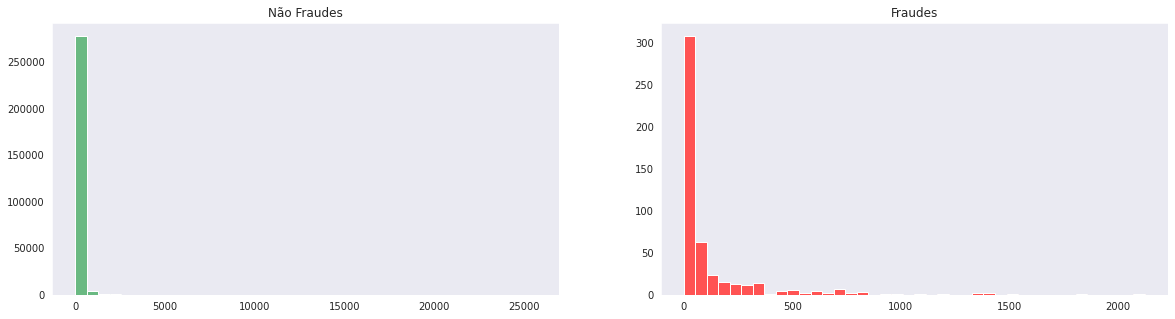

In [12]:
# distribuição da variável Amount para as categorias de fraudes e transações lícitas

fig, ax = plt.subplots(nrows= 1, ncols=2, figsize=(20, 5))

ax[0].hist(df.Amount[df.Class == 0], bins=40, color='#6ab982')
ax[0].set_title('Não Fraudes')

ax[1].hist(df.Amount[df.Class == 1], bins=40, color='#ff5353')
ax[1].set_title('Fraudes')

plt.show()

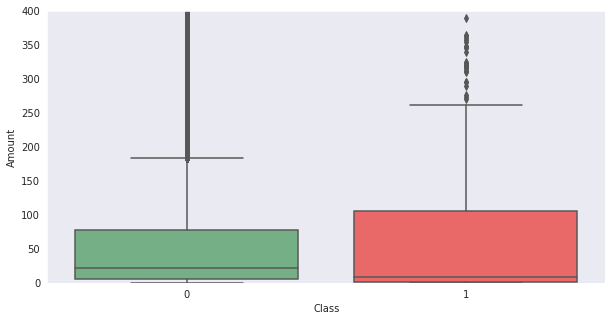

In [13]:
# distribuição da variável Amount para as categorias de fraudes e transações lícitas

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.boxplot(x=df.Class, y=df.Amount, data=df, palette=['#6ab982', '#ff5353'])
plt.ylim((0, 400));

Através deste boxplot e outro método que descreve algumas métricas estatisticas dos dados, foi analisado que as fraudes estão distribuidas em um intervalo de €0 até €2125, onde estão mais concentradas de €0 até aproximadamente €100.

Dessa mesma maneira, foi visto que as transações lícitas estão distribuidas em um intervalo maior, sendo de €0 até €284.315 e que estão mais concentradas de €0 até €80.

Bom, poderiamos então pensar que pelo fato das fraudes não passarem dos €2200, isso seria uma ótima notícia para o nosso modelo preditor, pois assim seria mais fácil de classificar as transações.

In [14]:
# estatísticas descritivas da variável Amount

df.loc[df.Class == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
transacoes_acima = df.loc[(df.Amount >= 2125) & (df.Class == 0)].shape[0]

print(f'A quantidade de transações lícitas acima do valor de €2125 é igual a: {transacoes_acima}')

A quantidade de transações lícitas acima do valor de €2125 é igual a: 603


In [16]:
quantidade_transacoes = df.Amount.shape[0]
percentual_transacoes_acima = (transacoes_acima / quantidade_transacoes) * 100

print(f'Percentual de transações lícitas que estão acima do valor de €2125 é igual a: {(percentual_transacoes_acima):.2f}%') 

Percentual de transações lícitas que estão acima do valor de €2125 é igual a: 0.21%


Analisando a fundo sobre essa variável, foi notado que apenas 0.21% das transações lícitas estão acima deste valor de €2125. Então, 99% das transações lícitas também estão em um intervalo igual ao das fraudes.

### **Variável Time**

Após uma análise completa na variável `Amount`,vou buscar extrair informações sobre a variável `Time`. 

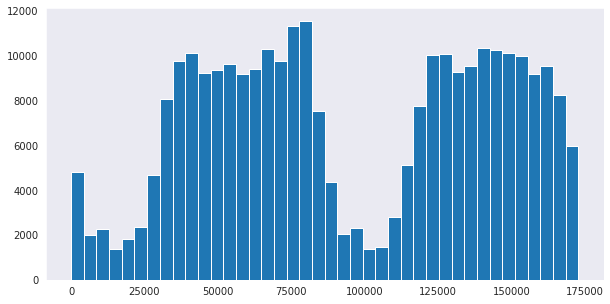

In [17]:
# distribuição da variável Time para categoria de transações lícitas

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(df.Time[df.Class == 0], bins=40);

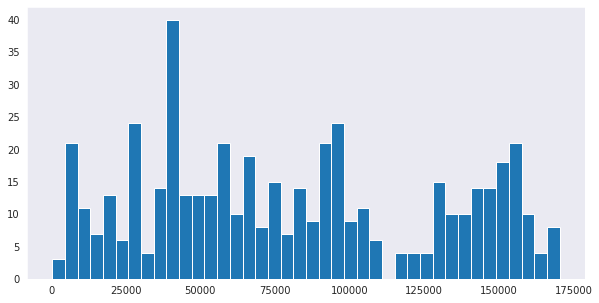

In [18]:
# distribuição da variável Time para categoria de fraudes

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(df.Time[df.Class == 1], bins=40);

Com base nos resultados acima, não possível coletar nenhuma informação importante sobre a as frequências dessa variável.

Seguindo na análise, no próximo tópico irei verificar o desbalancemento dos dados como foi introduzido no site do Kaggle.

### **Desbalanceamento dos Dados**

Como foi introduzido no escopo do projeto no site do Kaggle, a variável `Class` possui um forte desbalanceamento entre as categorias de transações lícitas e fraudes.


In [19]:
fraudes = df.loc[df.Class == 1].copy()
nao_fraudes = df.loc[df.Class == 0].copy()

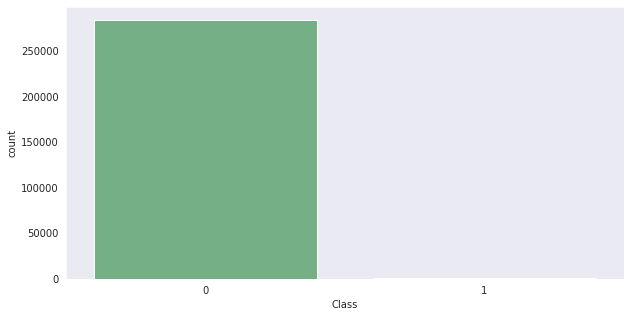

In [20]:
# checking distribution of the Class variable

fig, ax= plt.subplots(figsize=(10,5))

sns.countplot(x="Class", data=df, palette=['#6ab982', '#ff5353'], ax=ax)

plt.show()

Como podemos ver no gráfico acima, a quantidade de fraudes em comparação as transações lícitas é tão inferior que não aparece na sua visualização.

In [21]:
percentual_desbalanceamento = (len(fraudes) / df.shape[0]) * 100

print(f'Quantidade de transações lícitas: {len(nao_fraudes)}')
print(f'Qauntidade de fraudes: {len(fraudes)}')
print(f'Percentual de fraudes: {(percentual_desbalanceamento):.4f}%')

Quantidade de transações lícitas: 284315
Qauntidade de fraudes: 492
Percentual de fraudes: 0.1727%


Quando nós estamos trabalhando com fraudes em cartões de crédito já é esperado que se tenha menos fraudes do que transações lícitas.

No entanto, este problema pode prejudicar o modelo de classificação. Se por acaso eu treinasse o modelo com estes dados desbalanceados, o modelo sairia muito bem com os dados de treino, mas teria um péssimo resultado com os novos dados.

Isso acontece porque o modelo iria ter a variabilidade necessária para aprender com os dados de treino, e sim apenas decorar a classe majoritária.

Então, o próximo passo será realizar a preparação destes dados aplicando técnicas de padronização e logo após de balancemanto de dados.

##**Preparação dos Dados**

Anteriormente, foi falado sobre o problema de desbalanceamento e o quanto ele pode interferir nos resultados quando os dados forem aplicados ao um modelo de classificação. Neste tópico, irei trazer a solução para este problema, porém, antes de balancear as classes, é necessário realizar uma padronização nas variáveis `Amount` e `Time`.

Este conjunto de dados já sofreu algumas alterações quando foi realizado o processo de PCA, pois, para que este método de redução de dimensionalidade seja efetuado com sucesso, as variáveis quantitativas devem estar na mesma escala.

No boxplot a seguir, é possível notar este desbalanceamento entre as variáveis `Amount` e `Time` em relação a três variáveis escolhidas aleatoriamente que passaram pelo processo de PCA.

In [22]:
vars_antes = df[['Amount', 'Time', 'V5', 'V17', 'V23']].copy()

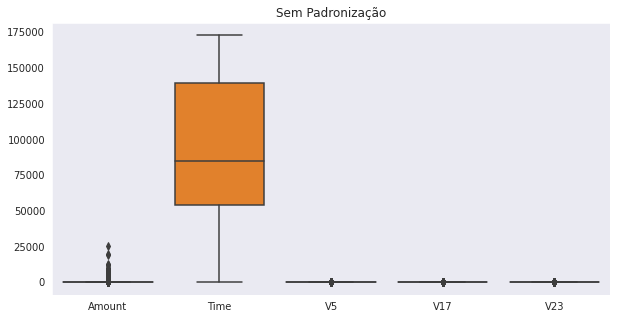

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.boxplot(data=vars_antes)

ax.set_title('Sem Padronização');

Conforme a visualização, podemos ver que as variáveis `Time` e `Amount` possuem uma ordem de grandeza muito discrepante das demais variáveis.

Para realizar a padronização destes dados, foi escolhida a técnica [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler) que tem por uma de suas funções minimizar a presença de outliers, visto que a variável `Amount` possui outliers.

Uma vez que a variável `Amount` possui outliers, técnicas que normalizam os dados utilizando a média como [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler), enviesariam o cálculo, pois a presença de outliers afeta diretamente o valor da média.

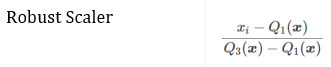

[Fonte](https://medium.com/@kesarimohan87/data-preprocessing-6c87d27156)

In [24]:
# cópia do dataset original
df_backup = df.copy()

#importando RobustScaler
from sklearn.preprocessing import RobustScaler

In [25]:
df_padronizado = df.copy()

df_padronizado[['Amount', 'Time']] = RobustScaler().fit_transform(df_padronizado[['Amount', 'Time']])

In [26]:
vars_depois = df_padronizado[['Amount', 'Time', 'V5', 'V17', 'V23']]

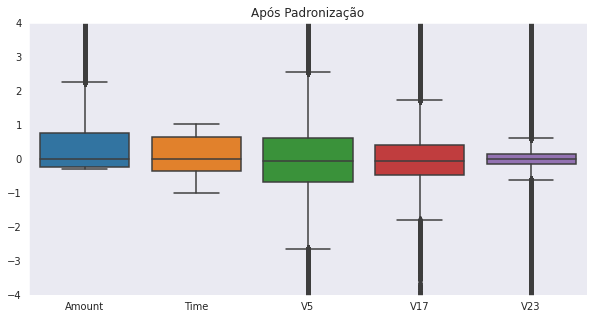

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.boxplot(data=vars_depois)

plt.ylim((-4, 4));

ax.set_title('Após Padronização');

###**Separação dos dados**

Antes de realizar o balanceamento de classes, é necessário separar os dados entre conjuntos de treino e validação.

O parâmetro `stratify=True` serve para garantir uma proporção igual entre as classes. Por exemplo, quando estamos efetuando a separação dos dados de teste, é preferível que estes dados possuam as mesmas quantidades de amostras entre as classes. Para que assim, os dados de teste não fiquem enviesados contendo um desbalancemento entre as classes.

In [37]:
from sklearn.model_selection import train_test_split

In [41]:
X = df_padronizado.drop('Class', axis=1)
y = df_padronizado['Class']

X_train, y_train, X_test, y_test = train_test_split(X, y, stratify=y, shuffle=True)

###**Balanceamento dos Dados**

